In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
img = cv2.imread('lena.bmp')

In [3]:
binary = img.copy()

* Convert lena into binary image
* Find out which position (rows and columns) contains value==255

In [5]:
#use bin_pos to store the position of the white points
bin_pos=np.zeros((512, 512))  
for i in range(binary.shape[0]):
    for j in range(binary.shape[1]):
        if binary[i,j,1]>=128:
            binary[i,j]=255
            bin_pos[i,j]=1

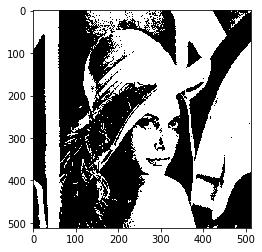

In [5]:
%matplotlib inline
plt.imshow(binary)

* create structing element

In [8]:
#sturcturing element
struct_r=[-2, -2, -2, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2]
struct_c=[-1, 0, 1, -2, -1, 0, 1, 2, -2, -1, 0, 1, 2, -2, -1, 0, 1, 2, -1, 0, 1]

#### Binary Dilation

In [11]:
dila=bin_pos.copy()
dilation=np.zeros((512, 512, 3))

for i in range(dila.shape[0]): 
    for j in range(dila.shape[1]):
        if dila[i][j]==1:
            for r in range(len(struct_r)):
                if (0<=i+struct_r[r]<=511) and (0<=j+struct_c[r]<=511):
                    dilation[i+struct_r[r]][j+struct_c[r]]=255

In [30]:
def binary_dilation(position, stru_ele_r, stru_ele_c):
    pos=position.copy()
    A=np.zeros((512, 512, 3))
    
    for i in range(pos.shape[0]): 
        for j in range(pos.shape[1]):
            if pos[i][j]==1:
                for r in range(len(stru_ele_r)):
                    if (0<=i+stru_ele_r[r]<=511) and (0<=j+stru_ele_c[r]<=511):
                        A[i+stru_ele_r[r]][j+stru_ele_c[r]]=255
                        
    return A

In [31]:
dilation_new=binary_dilation(bin_pos,struct_r,struct_c)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


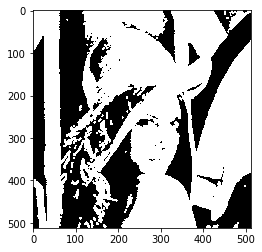

In [32]:
%matplotlib inline
plt.imshow(dilation_new)

In [16]:
A_left=np.zeros((512, 512, 3))

for i in range(1,511): #ignore when index =0 or 512, to prevent index out of range error
    for j in range(1,511):
        if A[i][j]==1:
            if A[i-1][j]==1 and A[i][j-1]==1 and A[i][j+1]==1 and A[i+1][j]==1:
                A_left[i][j]=255

#### Binary Erosion

In [23]:
#copy bin_pos
ero=bin_pos.copy()
erosion=np.zeros((512, 512, 3))
rm_flag=0;  #flag to identify whether remove the point


for i in range(ero.shape[0]): 
    for j in range(ero.shape[1]):
        if ero[i][j]==1:
            for r in range(len(struct_r)):
                if (0<=i+struct_r[r]<=511) and (0<=j+struct_c[r]<=511) and (ero[i+struct_r[r]][j+struct_c[r]]!=1):
                    rm_flag=1
            if rm_flag==0:
                erosion[i][j]=255
            rm_flag=0

In [34]:
def binary_erosion(position, stru_ele_r, stru_ele_c):
    pos=position.copy()
    A=np.zeros((512, 512, 3))
    rm_flag=0;  #flag to identify whether remove the point


    for i in range(pos.shape[0]): 
        for j in range(pos.shape[1]):
            if pos[i][j]==1:
                for r in range(len(stru_ele_r)):
                    if (0<=i+stru_ele_r[r]<=511) and (0<=j+stru_ele_c[r]<=511) and (ero[i+stru_ele_r[r]][j+stru_ele_c[r]]!=1):
                        rm_flag=1
                if rm_flag==0:
                    A[i][j]=255
                rm_flag=0
                
    return A

In [35]:
erosion_new=binary_erosion(bin_pos,struct_r,struct_c)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


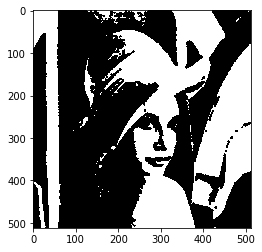

In [36]:
%matplotlib inline
plt.imshow(erosion_new)

#### hit-and-miss transform

* construct structuring element J and K (L shape)

In [37]:
J_r=[0, 0, 1]
J_c=[-1, 0, 0]

K_r=[-1, -1, 0]
K_c=[0, 1, 1]

In [47]:
#complement 
bin_pos_c=np.zeros((512, 512)) 

for i in range(bin_pos.shape[0]):
    for j in range(bin_pos.shape[1]):
        if bin_pos[i,j]==0:
            bin_pos_c[i,j]=1

In [39]:
part1=binary_erosion(bin_pos,J_r,J_c)
part2=binary_erosion(bin_pos_c,K_r,K_c)

In [49]:
#取part1和part2的交集
hit_and_miss=np.zeros((512, 512, 3))

for i in range(part1.shape[0]): 
    for j in range(part1.shape[1]):
        if (part1[i][j][1]==part2[i][j][1]) and (part1[i][j][1]==255) and (part2[i][j][1]==255):
            hit_and_miss[i][j]=255

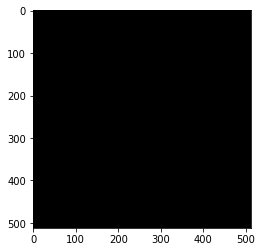

In [50]:
%matplotlib inline
plt.imshow(hit_and_miss)

#### opening

In [52]:
open1=binary_erosion(bin_pos,struct_r,struct_c)

open1_pos=np.zeros((512, 512))  
for i in range(open1.shape[0]):
    for j in range(open1.shape[1]):
        if open1[i,j,1]>=128:
            open1_pos[i,j]=1
            
opening=binary_dilation(open1_pos,struct_r,struct_c)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


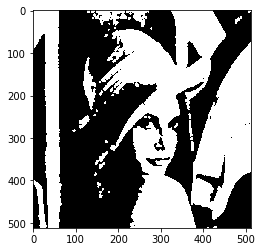

In [53]:
%matplotlib inline
plt.imshow(opening)

#### closing

In [54]:
close1=binary_dilation(bin_pos,struct_r,struct_c)

close1_pos=np.zeros((512, 512))  
for i in range(close1.shape[0]):
    for j in range(close1.shape[1]):
        if close1[i,j,1]>=128:
            close1_pos[i,j]=1
            
closing=binary_erosion(close1_pos,struct_r,struct_c)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


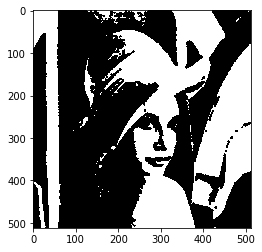

In [55]:
%matplotlib inline
plt.imshow(closing)